In [1]:
# !pip install kaggle

In [2]:
## configure kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [3]:
# !kaggle datasets list -s 'Happy-Sad Peoples'

In [4]:
# !kaggle datasets download -d hasnainkhan0123/binary-image-classification

In [5]:
# import zipfile

# zip_ref = zipfile.ZipFile('/workspaces/imageclassifier/binary-image-classification.zip')
# zip_ref.extractall('/workspaces/imageclassifier/')
# zip_ref.close()

In [6]:
import cv2

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [9]:
import cv2

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [11]:
import tensorflow as tf

2024-11-18 06:36:17.100718: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 06:36:17.269676: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 06:36:17.370686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731911777.536780    2848 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731911777.588869    2848 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 06:36:17.908720: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [37]:
# data_dir = 'data'
# image_exts = ['jpeg','jpg', 'bmp', 'png']

In [33]:
import matplotlib.pyplot as plt

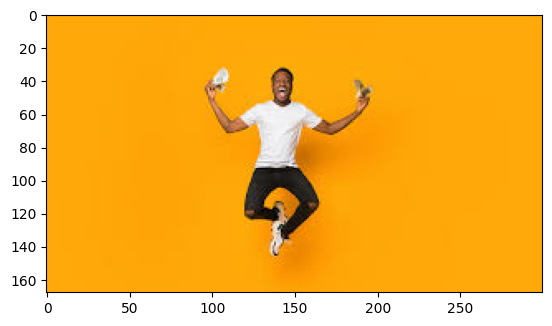

In [34]:
## load the images
img = tf.io.read_file('/workspaces/imageclassifier/testing-images/(1).jpeg')
img = tf.image.decode_image(img, channels=3)

## convert the image to a numpy array
img = tf.cast(img, tf.uint8)
img = img.numpy()

## display the image
plt.imshow(img)
plt.show()

In [38]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 173 files belonging to 2 classes.


In [39]:
data = data.map(lambda x,y: (x/255, y))

In [40]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [41]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [46]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, MaxPooling2D, Flatten, Conv2D

In [47]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5437 - loss: 0.8240 - val_accuracy: 0.3750 - val_loss: 0.7774
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5344 - loss: 0.6893 - val_accuracy: 0.5000 - val_loss: 0.7389
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6260 - loss: 0.5980 - val_accuracy: 0.8125 - val_loss: 0.5801
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8448 - loss: 0.5363 - val_accuracy: 0.7188 - val_loss: 0.4999
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8333 - loss: 0.3921 - val_accuracy: 0.8438 - val_loss: 0.3789
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7750 - loss: 0.4225 - val_accuracy: 0.8438 - val_loss: 0.3814
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9417 - loss: 0.3537 - val_accuracy: 0.9688 - val_loss: 0.3470
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9417 - loss: 0.2723 - val_accuracy: 1.0000 - val_loss: 0.0980
Epoch 9/20
4

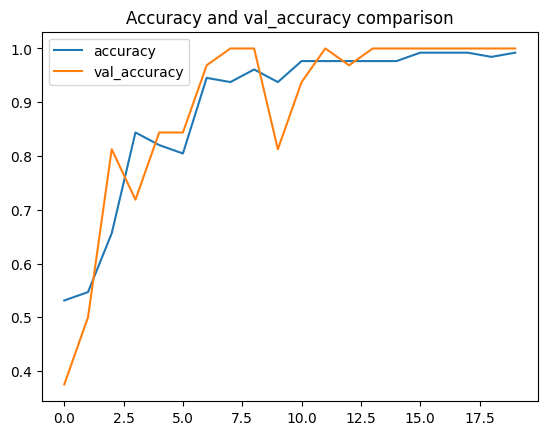

In [52]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy and val_accuracy comparison")
plt.legend()
plt.show()

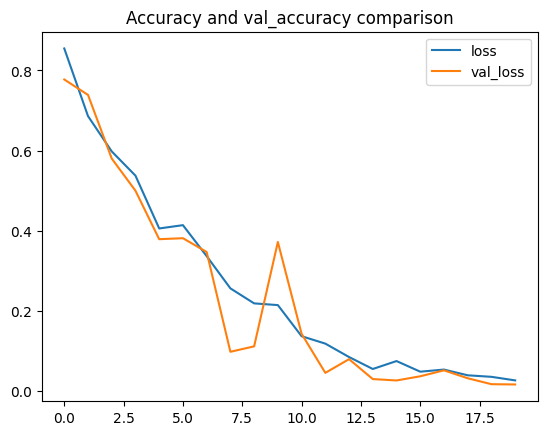

In [53]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Accuracy and val_accuracy comparison")
plt.legend()
plt.show()

In [55]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [56]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()